In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import plot_tree


In [ ]:
df = pd.read_csv("../data/dataproject2025_preprocessed_ordinal.csv")
# df = pd.read_csv("../data/dataproject2025_preprocessed.csv")
df.head()

,num__issue_d,num__loan duration,num__annual_inc,num__avg_cur_bal,num__bc_open_to_buy,num__bc_util,num__delinq_2yrs,num__dti,num__fico_range_high,num__funded_amnt,...,num__zip_code,num__Pct_afro_american,cat__emp_length,cat__emp_title,cat__grade,cat__home_ownership,cat__purpose,cat__sub_grade,Predicted probabilities,target
0,-1.687635,-0.637761,-0.740512,-0.745082,0.749479,-1.586997,-0.370384,-1.880644,2.106130,-1.180039,...,0.860517,-0.457200,2.0,33.0,1.0,0.0,3.0,6.0,0.053051,0
1,-1.687635,-0.637761,-0.470965,-0.250508,0.416937,-0.242629,-0.370384,0.530276,1.258044,1.180387,...,-0.103767,-0.261925,1.0,33.0,1.0,1.0,2.0,6.0,0.084507,0
2,-1.687635,-0.637761,4.254853,2.390279,0.248935,0.226833,-0.370384,0.019227,1.766896,1.281169,...,1.382703,-0.444418,5.0,41.0,0.0,0.0,2.0,2.0,0.037206,0
3,-1.687635,-0.637761,0.841762,1.367198,-0.426078,1.147974,-0.370384,-0.633779,0.749193,-0.416216,...,0.947014,-0.522693,1.0,33.0,1.0,0.0,2.0,7.0,0.061371,0
4,-1.687635,1.567986,-0.155910,0.630499,-0.342077,0.497129,0.729341,0.561034,-0.946979,1.238734,...,0.924589,-0.484517,6.0,33.0,3.0,0.0,2.0,19.0,0.345896,1


In [3]:
X = df.drop(columns = ["target", "Predicted probabilities"])
y = df["Predicted probabilities"]

In [4]:

# Linear regression surrogate
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Decision tree surrogate
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=4, random_state=42)

In [ ]:


y_pred_lin = lin_reg.predict(X)
y_pred_tree = tree_reg.predict(X)

print("Linear Regression - R²:", r2_score(y, y_pred_lin))
print("Linear Regression - MSE:", mean_squared_error(y, y_pred_lin))

print("Decision Tree - R²:", r2_score(y, y_pred_tree))
print("Decision Tree - MSE:", mean_squared_error(y, y_pred_tree))


Linear Regression - R²: 0.9335664545934166
Linear Regression - MSE: 0.0009372791763114662
Decision Tree - R²: 0.8075803557585776
Decision Tree - MSE: 0.002714756898144915


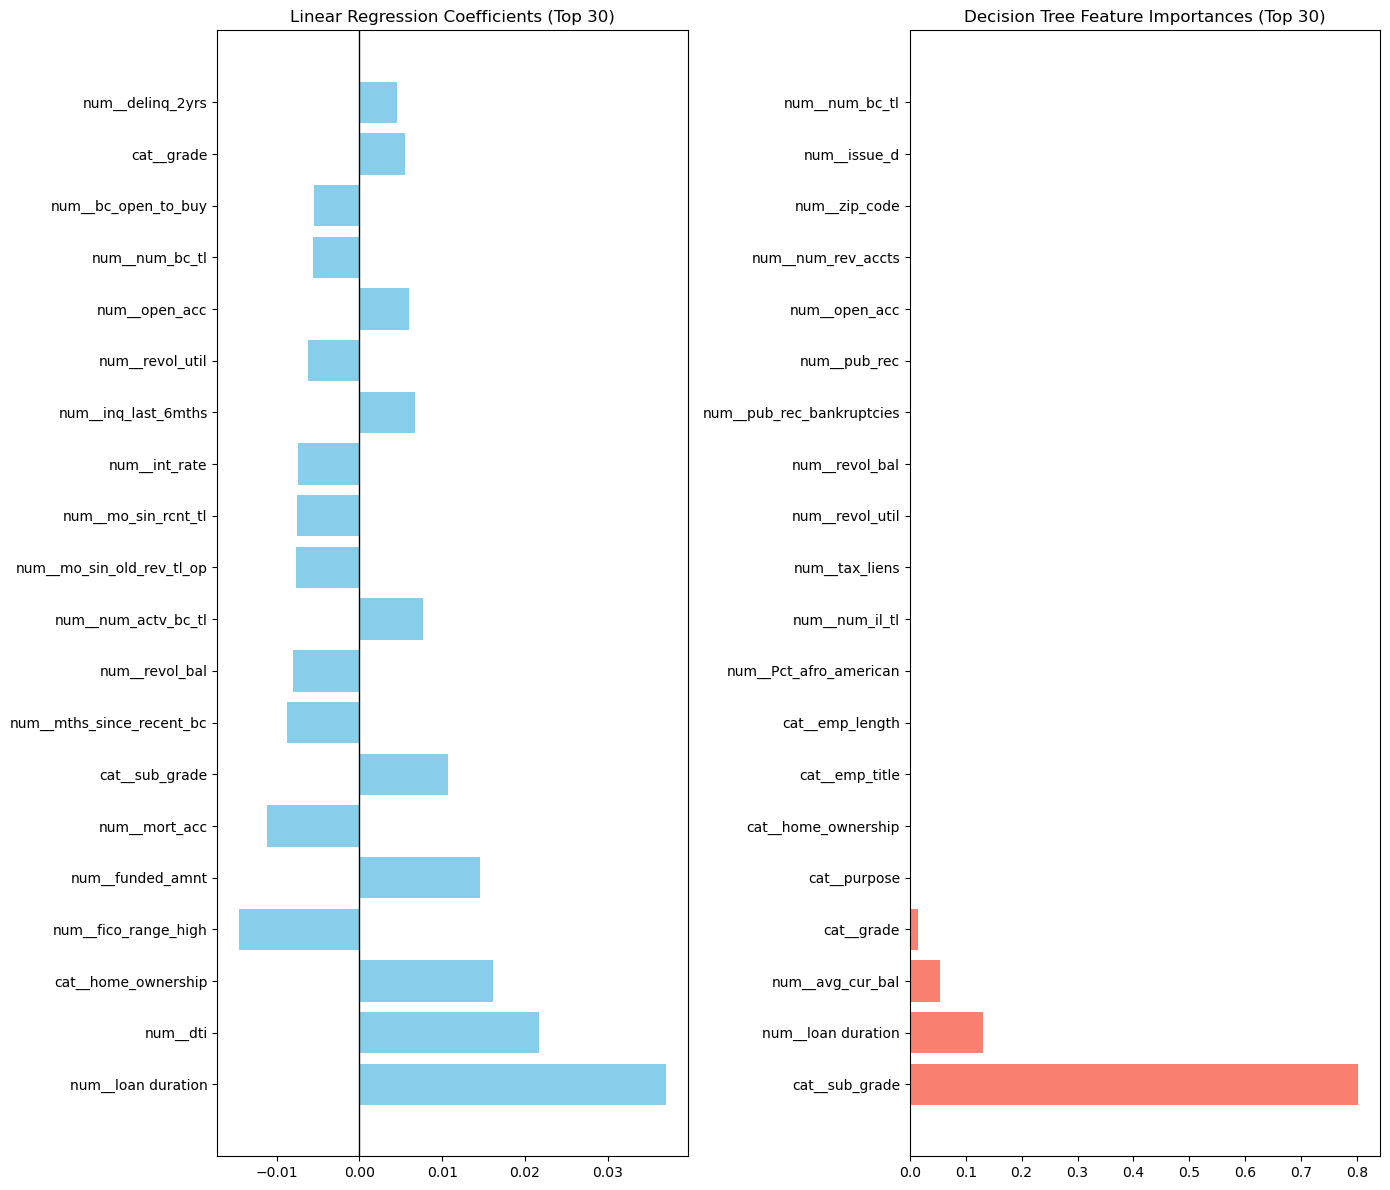

In [9]:


# Collect coefficients from Linear Regression
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear_Coefficient": lin_reg.coef_
})

# Collect importances from Decision Tree
importances_df = pd.DataFrame({
    "Feature": X.columns,
    "Tree_Importance": tree_reg.feature_importances_
})

# Top 20 for Linear Regression
top20_lin = coef_df.reindex(coef_df["Linear_Coefficient"].abs().sort_values(ascending=False).index).head(20)

# Top 20 for Decision Tree
top20_tree = importances_df.sort_values(by="Tree_Importance", ascending=False).head(20)

# Plot separately
fig, axes = plt.subplots(1, 2, figsize=(14, 12))

# Linear Regression Coefficients
axes[0].barh(top20_lin["Feature"], top20_lin["Linear_Coefficient"], color="skyblue")
axes[0].set_title("Linear Regression Coefficients (Top 30)")
axes[0].axvline(0, color="black", linewidth=1)

# Decision Tree Importances
axes[1].barh(top20_tree["Feature"], top20_tree["Tree_Importance"], color="salmon")
axes[1].set_title("Decision Tree Feature Importances (Top 30)")

plt.tight_layout()
plt.show()



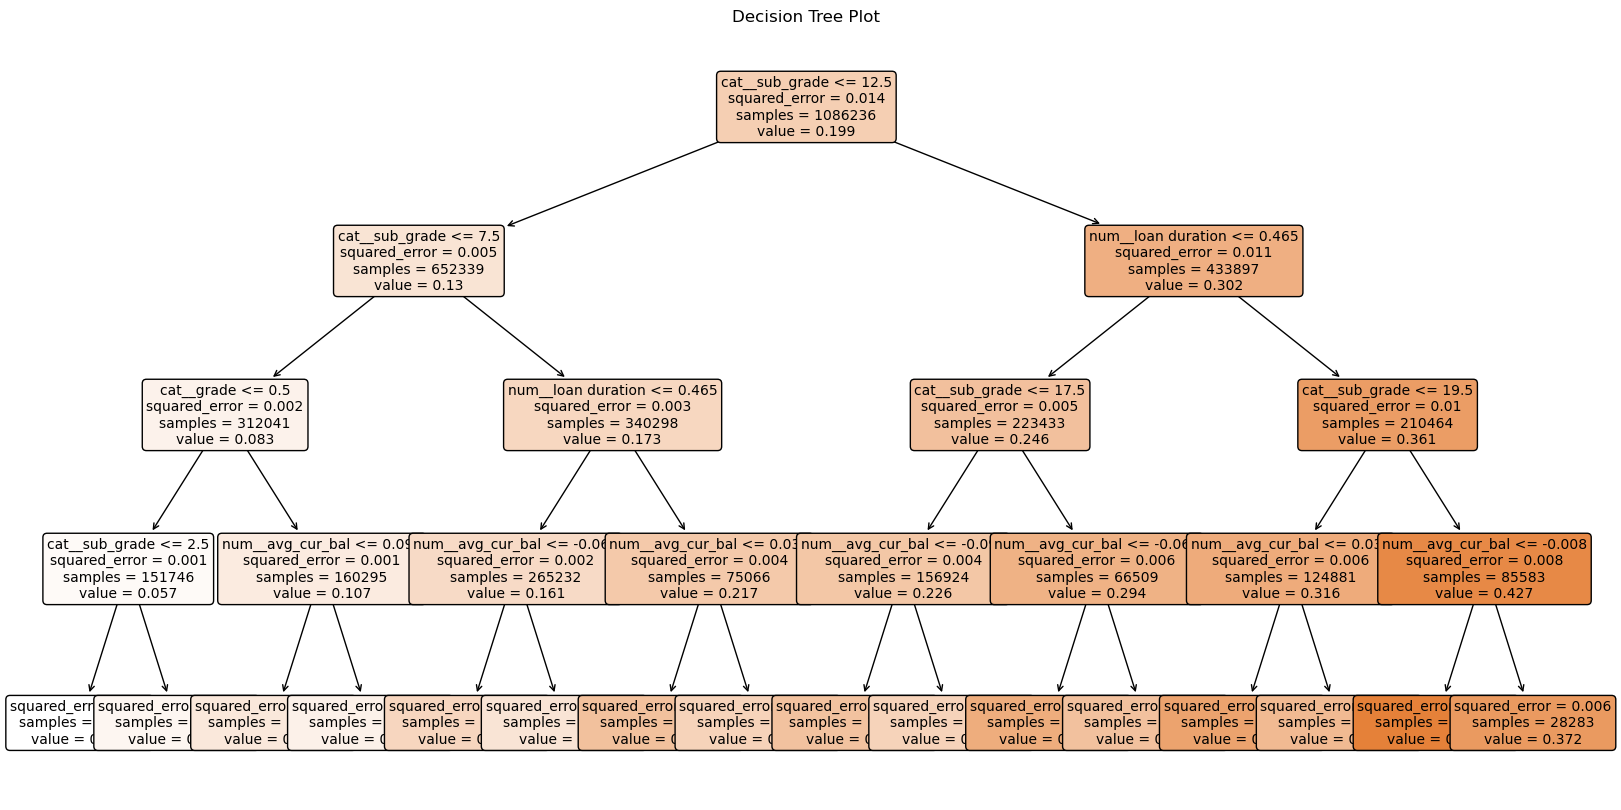

In [17]:
plt.figure(figsize=(20,10))
plot_tree(
    tree_reg,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Plot")
plt.show()

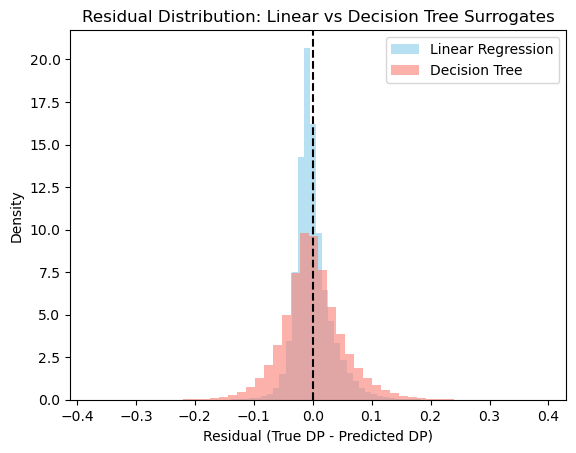

In [14]:
lin_residuals = y - y_pred_lin
tree_residuals = y - y_pred_tree

plt.hist(lin_residuals, bins=50, alpha=0.6, label="Linear Regression", color="skyblue", density=True)
plt.hist(tree_residuals, bins=50, alpha=0.6, label="Decision Tree", color="salmon", density=True)
plt.axvline(0, color="black", linestyle="--")
plt.legend()
plt.title("Residual Distribution: Linear vs Decision Tree Surrogates")
plt.xlabel("Residual (True DP - Predicted DP)")
plt.ylabel("Density")
plt.show()